# Data Wrangling Project - Analysis on Tweets From WeRateDogs

In [95]:
# import relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import os
import requests
import json

## Data Gathering

Data used for this project come from three seperate sources.

1) import 'twitter_archive_enhanced.csv' which was provided as a downloadable file 

In [96]:
df_tweet_archive = pd.read_csv('twitter_archive_enhanced.csv')

2) import 'image_predictions.tsv' from Udacity's server

In [97]:
# function to download a file from internet
def download_file(url, path):
    response = requests.get(url)
    with open (os.path.join(path,url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)

In [98]:
# download a file to the current directly
path = os.getcwd()
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
download_file(url, path)

# create a df with the downloaded file
df_image_pred = pd.read_csv('image-predictions.tsv', sep='\t')

3) import additional data relevant to each tweet using Twtitter API

In [5]:
import tweepy

consumer_key = 'xxx'
consumer_secret = 'xxx'
access_token = 'xxx'
access_secret = 'xxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
## make the list of all the tweet ids included in the tweet_archive df
tweet_id_list = df_tweet_archive.tweet_id.tolist()

import time
error_counts=0 # produce a count of deleted tweets
start = time.time() # count the execution time
with open('tweet_json.txt', mode='w') as file:
    for tweet_id in tweet_id_list:
        ranking = tweet_id_list.index(tweet_id)+1 
        if ranking%50==0:
            print(ranking) ## print out every time 50 tweets have been loaded
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            error_counts = error_counts + 1   
end = time.time()
print('Execution time: {}'.format(end-start))
print('Deleted tweets: {}'.format(error_counts))

50
100
150
200
250
300
350
400
450
500
550
600
650
700


Rate limit reached. Sleeping for: 404


750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600


Rate limit reached. Sleeping for: 483


1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
Execution time: 1998.4719579219818
Deleted tweets: 25


In [99]:
# open 'tweet_json.txt' file as a dataframe
with open('tweet_json.txt') as f:
    df_json=pd.read_json(f, lines=True)

df_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIA...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your...",NaN,NaN,None,NaN,False,7664,36013,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAU...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your...",NaN,NaN,None,NaN,False,5664,31076,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [...","{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAAN...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your...",NaN,NaN,None,NaN,False,3758,23382,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [...","{'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuu...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your...",NaN,NaN,None,NaN,False,7835,39303,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,"This is Franklin. He would like you to stop calling him 

## Data assessing

In the following, I will assess each dataframes both visually and programatically.  The assessment are put into two categories, quality and tidiness, and summarised at the end of this section.

#### tweet_archive table

In [100]:
df_tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [101]:
df_tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [102]:
# List all words incorrectly picked as name.  Assuming all names are capitalised
name_list = df_tweet_archive.name.unique()
wrong_name_list =[]
for name in name_list:
    if name.islower():
        wrong_name_list.append(name)
wrong_name_list

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'mad',
 'an',
 'very',
 'just',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [103]:
df_tweet_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

Other entries in name columns, that might not be actual name. (Found by visual assessing)
O (letter o), Fillup, Socks, Filup.
In the following, I will check these individually

In [104]:
## enter dog name and returns the text content
def name_check (name):
    tweet_id = df_tweet_archive[df_tweet_archive['name']==name].text
    return tweet_id

In [105]:
name_check('O')

775    This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC
Name: text, dtype: object

In [106]:
name_check('Fillup')

1398    Meet Fillup. Spaghetti is his main weakness. Also pissed because he's rewarded with cat treats 11/10 it'll be ok pup https://t.co/TEHu55ZQKD
Name: text, dtype: object

In [107]:
name_check('Filup')

2251    This is Filup. He is overcome with joy after finally meeting his father. 10/10 https://t.co/TBmDJXJB75
Name: text, dtype: object

In [108]:
name_check('Socks')

1359    This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf
Name: text, dtype: object

O turns out to be O'Malley, and the rest of names were actuall names.

In [109]:
## check if there are any rows with multiple stages of dog
def check_stages_of_dog(df, col1, col2):
    df = df[(df[col1] != 'None') & (df[col2] != 'None')]
    return df

In [110]:
check_stages_of_dog(df_tweet_archive, 'doggo', 'floofer')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None


At least there is one entry with multiple entries for stages of dog

In [111]:
df_tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [112]:
## query the tweets with unusual ratings from the original tweets
df_tweet_archive.query('(in_reply_to_status_id == "NaN" & retweeted_status_id == "NaN")&(rating_denominator != 10 | rating_numerator>=15)')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.co...",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t ...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.co...",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https:/

#### df_image_pred

In [113]:
df_image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [114]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [115]:
df_image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [116]:
df_image_pred.query('img_num > 1')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
315,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True


#### df_json table

In [117]:
# import display to be able to see all the columns
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 150
df_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIA...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your...",NaN,NaN,None,NaN,False,7664,36013,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAU...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your...",NaN,NaN,None,NaN,False,5664,31076,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [...","{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAAN...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your...",NaN,NaN,None,NaN,False,3758,23382,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [...","{'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuu...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your...",NaN,NaN,None,NaN,False,7835,39303,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,"This is Franklin. He would like you to stop calling him 

In [118]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2331 non-null   datetime64[ns, UTC]
 1   id                             2331 non-null   int64              
 2   id_str                         2331 non-null   int64              
 3   full_text                      2331 non-null   object             
 4   truncated                      2331 non-null   bool               
 5   display_text_range             2331 non-null   object             
 6   entities                       2331 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2331 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

### Quality
#### `df_tweet_archive` table
- timestamp is an object not datetime  
- text column include url, but this is redundunt as there exists extended_url column.

Naming problems
- In name column, some entries has None, other has some word which is not a name.  (wrong_name_list).  
- Name 'O' is actualy 'O'Malley  

Multiple issues with rating
- date, or time reference ('24/7', '4/20', '9/11', '7/11') in the text mistaken as a rating  
- '1/2' in the text (3 1/2 legged) mistaken as a rating  
- ratings with decimals not recorded correctly '9.75/10, 11.27/10, 11.26/10' rated as 75/10, 27/10, 26/10  
- '420/10' given to snoop dog ... not a dog.  
- ratings include 'group rating' in which multiple dogs are rated.  denominator is multiplied by num of dogs and numerator is the sum.  


- last four columns ('doggo', 'floofer', 'pupper' and 'puppo') has 'None' as an entry, rather than 'NaN'

notes  
- '1776/10' in reference to US independence day.  Not a mistake but might give an issue later when analysing.  

#### `df_image_pred` table
-- mixture of upper and lower letter for the first character of breeds

#### `df_json` table
- Missing data due to deleted tweet


### Tidiness

#### `df_tweet_archive` table
- retweets/replies to a tweet are included.  

- doggo, pupper, puppo and floof can be put as one category e.g. stages_of_dog


#### `df_image_pred` table
- Missing data.  `df_tweet_archive` has 2097 entries (excluding retweetrs and replies).  this df has 2075
- Multiple True values for one dog.  Make new column with the only one prediction.
- Althought this table stand as its own observational unit, the predicted breed can be added to df_tweet_archive_master


#### `df_json` table
- retweets, replies to a tweet, and quoted tweets are included  
- json object inside columns (entities, extended_entities, user)  
- info from this table can be joined to df_tweet_archive to form a single table

## Data Cleaning

In [119]:
df_tweet_archive_clean = df_tweet_archive.copy()
df_image_pred_clean = df_image_pred.copy()
df_json_clean = df_json.copy()

#### Missing values and tidiness
Treat these problems for each tables first.  Then the clean up the quality issues

#### df_tweet_archive

In [120]:
df_tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### Define
Retweets and replies to a tweets are included.  Use boolean isnull to detele all these entries

#### Code

In [121]:
df_tweet_archive_clean = df_tweet_archive_clean[df_tweet_archive_clean.retweeted_status_id.isnull()]
df_tweet_archive_clean = df_tweet_archive_clean[df_tweet_archive_clean.in_reply_to_status_id.isnull()]

#### Test

In [122]:
df_tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [123]:
# now that we know the code worked, we can drop all columns not neccesary 
df_tweet_archive_clean = df_tweet_archive_clean.drop(['in_reply_to_status_id',
                                                      'in_reply_to_user_id',
                                                      'retweeted_status_id',
                                                      'retweeted_status_user_id',
                                                      'retweeted_status_timestamp'], axis=1)

#### Define
Put all the inforamtion regards stages_of_dog in one column.  First replace all the None entry by empty string, then concatenate strings.  Then for the entries with multiple stages of dog, add comma mapping.

#### Code

In [124]:
## define function which replaces None with ''.
def replace_None (df, col):
    df[col] = df[col].replace('None','')

In [125]:
replace_None(df_tweet_archive_clean, 'doggo')
replace_None(df_tweet_archive_clean, 'floofer')
replace_None(df_tweet_archive_clean, 'pupper')
replace_None(df_tweet_archive_clean, 'puppo')

In [126]:
## add new column which combines the string from four columns 
df_tweet_archive_clean['stages_of_dog']=df_tweet_archive_clean.doggo + df_tweet_archive_clean.floofer + df_tweet_archive_clean.pupper + df_tweet_archive_clean.puppo

In [127]:
# replace combined stages into two separate entry, and replace all empty cells to NaN
df_tweet_archive_clean.stages_of_dog = df_tweet_archive_clean.stages_of_dog.replace({'doggopuppo':'doggo, puppo',
                                                                                     'doggofloofer':'doggo, floofer',
                                                                                     'doggopupper':'doggo, pupper',
                                                                                     '':np.NaN})

In [128]:
# delete unneccesary columns:
df_tweet_archive_clean = df_tweet_archive_clean.drop(['doggo',
                                                      'puppo',
                                                      'floofer',
                                                      'pupper'],axis=1)

#### Test

In [129]:
df_tweet_archive_clean.stages_of_dog.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

#### df_json

In [130]:
df_json_clean

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIA...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your...",NaN,NaN,None,NaN,False,7664,36013,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAU...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your...",NaN,NaN,None,NaN,False,5664,31076,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [...","{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAAN...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your...",NaN,NaN,None,NaN,False,3758,23382,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [...","{'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuu...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your...",NaN,NaN,None,NaN,False,7835,39303,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,"This is Franklin. He would like you to stop calling him 

#### Define
Drop any rows that are retweets, replies, or quoted tweet the method used for df_tweet_archive is used.  Then the rest of structural issues can be solved by simply selecting the relevant columns for the updated dataframe.  The relevant columns are tweet_id, number of retweets and number of favorites.  Since the table will be joined with tweet_archive df, all the relevant but duplicated columns can also be removed (i.e. text column)

#### Code

In [131]:
# deleting retweets and replies
df_json_clean = df_json_clean[df_json_clean.retweeted_status.isnull()]
df_json_clean = df_json_clean[df_json_clean.in_reply_to_status_id.isnull()]
df_json_clean = df_json_clean[df_json_clean.quoted_status_id.isnull()]

In [132]:
# quick check to make sure only original tweets are in the df.
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2066 non-null   datetime64[ns, UTC]
 1   id                             2066 non-null   int64              
 2   id_str                         2066 non-null   int64              
 3   full_text                      2066 non-null   object             
 4   truncated                      2066 non-null   bool               
 5   display_text_range             2066 non-null   object             
 6   entities                       2066 non-null   object             
 7   extended_entities              1964 non-null   object             
 8   source                         2066 non-null   object             
 9   in_reply_to_status_id          0 non-null      float64            
 10  in_reply_to_status_id_st

In [133]:
# select only the columns of interest
cols = ['id','retweet_count','favorite_count']
df_json_clean = df_json_clean[cols]

#### Test

In [134]:
df_json_clean

,id,retweet_count,favorite_count
0,892420643555336193,7664,36013
1,892177421306343426,5664,31076
2,891815181378084864,3758,23382
3,891689557279858688,7835,39303
4,891327558926688256,8437,37526
...,...,...,...
2326,666049248165822465,40,96
2327,666044226329800704,130,271
2328,666033412701032449,41,112
2329,666029285002620928,42,121


#### Define
Join the df_json and df_tweet_archive table together on id.  Since some tweets are deleted, inner join on id will be used. 

In [135]:
# inner join two tables with tweet_id as a key
df_tweet_archive_clean = df_tweet_archive_clean.merge(df_json_clean, left_on='tweet_id', right_on='id', how='inner')
# drop duplicted 'id' column.  Also drop source column in process as this is also not needed
df_tweet_archive_clean = df_tweet_archive_clean.drop(['source','id'],axis=1)

#### Test

In [136]:
df_tweet_archive_clean

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,7664,36013
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,5664,31076
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,3758,23382
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,7835,39303
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,8437,37526
...,...,...,...,...,...,...,...,...,...,...
2060,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,NaN,40,96
2061,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,NaN,130,271
2062,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,NaN,41,112
2063,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,NaN,42,121


In [137]:
df_tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2064
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2065 non-null   int64 
 1   timestamp           2065 non-null   object
 2   text                2065 non-null   object
 3   expanded_urls       2062 non-null   object
 4   rating_numerator    2065 non-null   int64 
 5   rating_denominator  2065 non-null   int64 
 6   name                2065 non-null   object
 7   stages_of_dog       331 non-null    object
 8   retweet_count       2065 non-null   int64 
 9   favorite_count      2065 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 177.5+ KB


#### df_image_pred

#### Define
name of breeds starts are mixture of upper or lower letter.  also _ can be replace with simple space.  Define a function to capitalise and remove undersocre then apply to each columns.

#### Code

In [138]:
def fix_breed (text):
    text = text.capitalize() # capitalise the string
    text = text.replace('_',' ') #remove undersocre and replace with space
    return text

In [139]:
df_image_pred_clean['p1']=df_image_pred_clean['p1'].apply(lambda x: fix_breed(x))
df_image_pred_clean['p2']=df_image_pred_clean['p2'].apply(lambda x: fix_breed(x))
df_image_pred_clean['p3']=df_image_pred_clean['p3'].apply(lambda x: fix_breed(x))

#### Test

In [140]:
df_image_pred_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper towel,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


#### Define
merge all prediction to one column.  If multiple columns are true, then pick the one with the higest confidence.  If all false, return null.  Use np.select function

In [141]:
df_image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Code

In [142]:
df_image_pred_clean['breed'] = np.select([df_image_pred_clean.p1_dog, df_image_pred_clean.p2_dog, df_image_pred_clean.p3_dog],
                                         [df_image_pred_clean.p1, df_image_pred_clean.p2, df_image_pred_clean.p3], default=np.NaN)

#### Test

In [143]:
## quick glance at the first 20 entry.
df_image_pred_clean.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True,Welsh springer spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,German shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True,Rhodesian ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.651137,True,English springer,0.263788,True,Greater swiss mountain dog,0.016199,True,Bernese mountain dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box turtle,0.933012,False,Mud turtle,0.045885,False,Terrapin,0.017885,False,NaN
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan mastiff,0.058279,True,Fur coat,0.054449,False,Chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping cart,0.962465,False,Shopping basket,0.014594,False,Golden retriever,0.007959,True,Golden retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature poodle,0.201493,True,Komondor,0.192305,True,Soft-coated wheaten terrier,0.082086,True,Miniature poodle


### Quality issues

#### df_tweets_archive_clean

#### Define
Change timestamp from string to datetime using pd.to_datetime

#### Code

In [144]:
df_tweet_archive_clean.timestamp=pd.to_datetime(df_tweet_archive_clean.timestamp)

#### Test

In [145]:
df_tweet_archive_clean.timestamp.dtype

datetime64[ns, UTC]

#### Define
take away the url within text as extended_url already exists.  Find the position of 'http' and slice to get rid of url.

#### Code

In [146]:
# define function to cut out the url from text
def slice_out_url (text):
    pos = text.find('http')
    new_text = text[:pos-1]
    return new_text

df_tweet_archive_clean.text = df_tweet_archive_clean.text.apply(lambda x: slice_out_url(x))

#### Test

In [147]:
## count the number of rows which include 'http'
df_tweet_archive_clean.text.str.contains('http').sum()

0

#### Define
Replace all the wrong entries in the name columns with np.NaN.  Replace the name O with O'Malley.  Use loc to extract relevant rows and set them to np.NaN (or O'Malley)

#### Code

In [148]:
wrong_name_list

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'mad',
 'an',
 'very',
 'just',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [149]:
# add None to wrong_name_list before 
wrong_name_list.append('None')
# replace all the wrong names with NaN
df_tweet_archive_clean.loc[df_tweet_archive_clean.name.isin(wrong_name_list),'name'] = np.NaN
# replace O with O'Malley
df_tweet_archive_clean.loc[df_tweet_archive_clean.name=='O','name'] = "O'Malley"

#### Test

In [150]:
df_tweet_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',
       'B

#### Define
There are multiple issues with ratings,  I will put this into three different steps.  
Here is the first step.  
-- date, or time reference ('24/7', '4/20', '9/11', '7/11') in the text mistaken as a rating  
-- '1/2' in the text (3 1/2 legged) mistaken as a rating  
 
Firstly, find entries with denominator which is not 10, and has two ratings of form xx/xx.  Inspect the text and replace appropriately.

In [151]:
# define a function to find which rows have more than two entries with the form xx/xx where x is some number
import re
def find_rating(text):
    ratings = re.findall('([0-9]+/[0-9]+)', text)
    if len(ratings)>1:
        return True
    else:
        return False

In [152]:
df_wrong_rating=df_tweet_archive_clean[df_tweet_archive_clean.text.apply(lambda x:find_rating(x))][['text','rating_numerator','rating_denominator']]
df_wrong_rating=df_wrong_rating.query('rating_denominator !=10')
df_wrong_rating

,text,rating_numerator,rating_denominator
826,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP",9,11
920,Happy 4/20 from the squad! 13/10 for all,4,20
956,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,50,50
1395,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10,7,11
2044,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10,1,2


List of the incorrect ratings.  All of these has correct rating that comes after the initial wrong 'rating'.  Iterate over this and replace with the second correct rating.

In [153]:
# made the list of index for tweets with wrong rating
wrong_rating_list = df_wrong_rating.index.tolist()
# iterate over each tweet
for i in wrong_rating_list:
    tweet = df_tweet_archive_clean.loc[i,'text'] #extract text
    ratings = re.findall('([0-9]+/[0-9]+)', tweet) # find two "ratings", rating[1] being the correct rating
    df_tweet_archive_clean.loc[i,'rating_numerator'] = int(ratings[1].split('/')[0]) # update the numerator and denominator.
    df_tweet_archive_clean.loc[i,'rating_denominator'] = int(ratings[1].split('/')[1])

#### Test

In [154]:
df_tweet_archive_clean[df_tweet_archive_clean.index.isin(wrong_rating_list)]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog,retweet_count,favorite_count
826,740373189193256964,2016-06-08 02:41:38+00:00,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.co...",14,10,NaN,NaN,13210,34738
920,722974582966214656,2016-04-21 02:25:47+00:00,Happy 4/20 from the squad! 13/10 for all,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13,10,NaN,NaN,1541,4052
956,716439118184652801,2016-04-03 01:36:11+00:00,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10,Bluebert,NaN,206,2347
1395,682962037429899265,2016-01-01 16:30:13+00:00,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10,10,Darrel,NaN,16383,36469
2044,666287406224695296,2015-11-16 16:11:11+00:00,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,NaN,NaN,60,135


#### Define
Here is the second step of cleaning rating columns  

ratings with decimals not recorded correctly '9.75/10, 11.27/10, 11.26/10' rated as 75/10, 27/10, 26/10  

Change the data type of rating_numerator to float first.  Then find the decimal rating with regular explassion.  Iterate over each entry with decimal rating and update it.

#### Code

In [155]:
df_tweet_archive_clean['rating_numerator']=df_tweet_archive_clean['rating_numerator'].astype(float)

In [156]:
df_tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2064
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2065 non-null   int64              
 1   timestamp           2065 non-null   datetime64[ns, UTC]
 2   text                2065 non-null   object             
 3   expanded_urls       2062 non-null   object             
 4   rating_numerator    2065 non-null   float64            
 5   rating_denominator  2065 non-null   int64              
 6   name                1383 non-null   object             
 7   stages_of_dog       331 non-null    object             
 8   retweet_count       2065 non-null   int64              
 9   favorite_count      2065 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(4)
memory usage: 257.5+ KB


In [157]:
def find_float_rating(text):
    rating = re.findall('([0-9]+\.[0-9]+/[0-9]+)', text)
    return len(rating)!=0

In [158]:
# create the table and check the ratings
df_float_rating=df_tweet_archive_clean[df_tweet_archive_clean.text.apply(lambda x:find_float_rating(x))][['text','rating_numerator','rating_denominator']]
df_float_rating

,text,rating_numerator,rating_denominator
40,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",5.0,10
506,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",75.0,10
563,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,27.0,10
1443,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,26.0,10


In [159]:
# made the list of index for tweets with wrong rating
float_rating_list = df_float_rating.index.tolist()

for i in float_rating_list:
    tweet = df_tweet_archive_clean.loc[i,'text'] #extract text
    rating = re.findall('([0-9]+\.[0-9]+/[0-9]+)', tweet) # find extract float ratings 
    df_tweet_archive_clean.loc[i,'rating_numerator'] = float(rating[0].split('/')[0]) #split to get numerator and change the datatype to float
    

#### Test

In [160]:
df_tweet_archive_clean[df_tweet_archive_clean.index.isin(float_rating_list)]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog,retweet_count,favorite_count
40,883482846933004288,2017-07-08 00:28:19+00:00,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10,Bella,NaN,8966,42774
506,786709082849828864,2016-10-13 23:23:56+00:00,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,NaN,6210,18490
563,778027034220126208,2016-09-20 00:24:34+00:00,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10,Sophie,pupper,1630,6602
1443,680494726643068929,2015-12-25 21:06:00+00:00,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10,NaN,NaN,480,1703


#### Define
Here is the last step to cleaning the rating column  

-- ratings include 'group rating' in which multiple dogs are rated.  denominator is multiplied by num of dogs and numerator is the sum.  
divide numerator by denominator and create a new column with new rating in float.  Check the rating that are higher than 1.5 as these are likely to be anomaly.

#### Code

In [161]:
df_tweet_archive_clean['rating'] = round(df_tweet_archive_clean.rating_numerator / df_tweet_archive_clean.rating_denominator,2)
df_tweet_archive_clean[df_tweet_archive_clean['rating'] > 1.5]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog,retweet_count,favorite_count,rating
385,810984652412424192,2016-12-19 23:06:23+00:00,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24.0,7,Sam,NaN,1460,5409,3.43
744,749981277374128128,2016-07-04 15:00:45+00:00,This is Atticus. He's quite simply America af. 1776/10,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10,Atticus,NaN,2460,5114,177.60
1789,670842764863651840,2015-11-29 05:52:33+00:00,After so many requests... here you go.\n\nGood dogg. 420/10,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10,NaN,NaN,8265,23624,42.00


id_385: does not contain the rating  
id_744: independence day dog  
id_1789: snoop dog  
Safe to say we can drop these entries.

In [162]:
df_tweet_archive_clean=df_tweet_archive_clean[df_tweet_archive_clean['rating'] < 1.5]

#### Test

In [163]:
df_tweet_archive_clean.rating

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
       ... 
2060    0.5
2061    0.6
2062    0.9
2063    0.7
2064    0.8
Name: rating, Length: 2062, dtype: float64

In [164]:
df_tweet_archive_clean.rating.describe()

count    2062.000000
mean        1.058434
std         0.214431
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.400000
Name: rating, dtype: float64

In [165]:
# drop numerator and denominator as these columns are redundunt
df_tweet_archive_clean = df_tweet_archive_clean.drop(['rating_numerator','rating_denominator'],axis=1)

**Cleaning procedure is complete and the cleaned up table is saved as the twitter_archive_master.csv**

In [166]:
# adding breed column from the image_pred to complete the master table which will be used for analysis
df_tweet_archive_master = df_tweet_archive_clean.merge(df_image_pred_clean[['tweet_id','breed']], 
                                                       left_on='tweet_id', 
                                                       right_on='tweet_id', 
                                                       how='left')

In [167]:
# check the final table
df_tweet_archive_master

,tweet_id,timestamp,text,expanded_urls,name,stages_of_dog,retweet_count,favorite_count,rating,breed
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,7664,36013,1.3,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,5664,31076,1.3,Chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,3758,23382,1.2,Chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,NaN,7835,39303,1.3,Labrador retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,NaN,8437,37526,1.2,Basset
...,...,...,...,...,...,...,...,...,...,...
2057,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://twitter.com/dog_rates/status/666049248165822465/photo/1,NaN,NaN,40,96,0.5,Miniature pinscher
2058,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://twitter.com/dog_rates/status/666044226329800704/photo/1,NaN,NaN,130,271,0.6,Rhodesian ridgeback
2059,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://twitter.com/dog_rates/status/666033412701032449/photo/1,NaN,NaN,41,112,0.9,German shepherd
2060,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://twitter.com/dog_rates/status/666029285002620928/photo/1,NaN,NaN,42,121,0.7,Redbone


In [168]:
df_tweet_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analysis

In [169]:
df = df_tweet_archive_master.copy()

In [170]:
# create a directly to save figures.
save_dir = 'figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

Rating trend over the time period

C:\Users\yu298\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1104: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


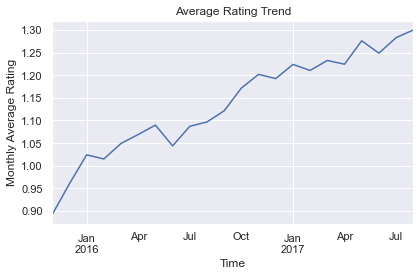

In [171]:
# group by every each months and check the change of avg rating over the period
df.groupby(df.timestamp.dt.to_period('M')).mean().plot(y='rating',legend=False)
plt.title('Average Rating Trend')
plt.ylabel('Monthly Average Rating')
plt.xlabel('Time')
plt.tight_layout()
plt.savefig(os.path.join(save_dir,'rating_trend.png'))

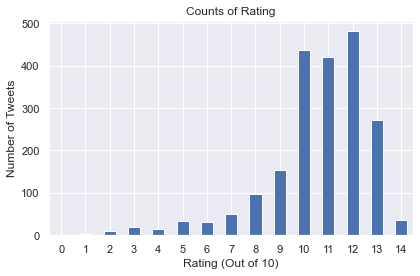

In [172]:
# Count the tweets with different rating.  Each rating has range of 0.1 (e.g. 0.35-0.45) then translated to equivalent
# rating out of ten.
df.groupby(pd.cut(df['rating'], np.arange(-0.05,1.55, 0.1))).count().plot.bar(y='tweet_id',
                                                                              legend=False, 
                                                                              xticks=range(0,15),
                                                                              rot=0)
plt.title('Counts of Rating')
plt.ylabel('Number of Tweets')
plt.xlabel('Rating (Out of 10)')

plt.tight_layout()
plt.savefig(os.path.join(save_dir,'rating_counts.png'))

In [173]:
# calculate the percentage of ratings that is bigger than or equal to 10. 
len(df.query('rating>=1'))/len(df), len(df.query('rating>1'))/len(df)

(0.7977691561590688, 0.5863239573229874)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


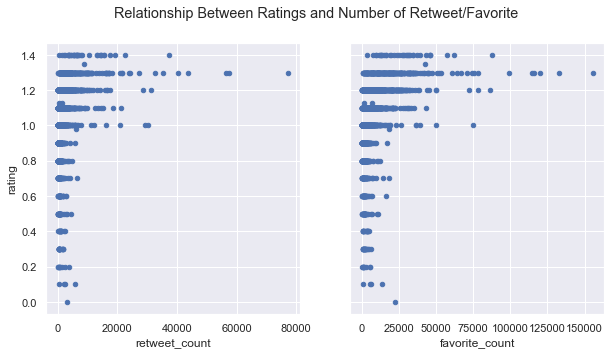

In [174]:
# Check the relationship between rating and number of retweets/favorite
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(10,5))

df.plot(kind='scatter',x='retweet_count',y='rating', ax=ax1)
df.plot(kind='scatter', x='favorite_count',y='rating', ax=ax2)

plt.suptitle('Relationship Between Ratings and Number of Retweet/Favorite')
plt.ylabel('Rating')

plt.savefig(os.path.join(save_dir,'rating_retweet_favorite_relation.png'))

In [175]:
# calculate the correlation 
rating_retweet_correlation = df['rating'].corr(df['retweet_count'])
rating_favorite_correlation = df['rating'].corr(df['favorite_count'])

print('The correlation rating and retweet: {}'.format(rating_retweet_correlation))
print('The correlation rating and favorite: {}'.format(rating_favorite_correlation))

The correlation rating and retweet: 0.3001288471235388
The correlation rating and favorite: 0.39090756438754093


In [176]:
# create a df which grouped data per breed
df_breed = df.groupby(['breed']).agg({'tweet_id':'count','rating':'mean'})
df_breed = df_breed.rename(columns={'tweet_id':'tweet_counts','rating':'avg_rating'})

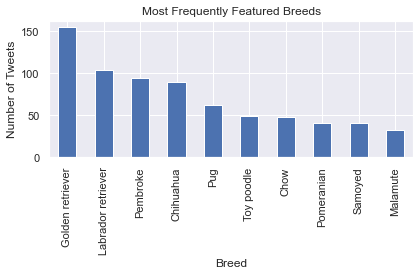

In [177]:
# what is most frequent dog entry
df_breed.nlargest(10,'tweet_counts').plot.bar(y='tweet_counts',legend=False)
plt.title('Most Frequently Featured Breeds')
plt.ylabel('Number of Tweets')
plt.xlabel('Breed')

plt.tight_layout()
plt.savefig(os.path.join(save_dir,'breed_frequency.png'))

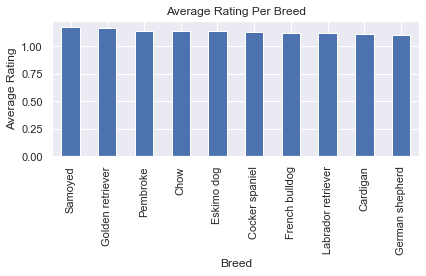

In [178]:
# average rating per breed.  Only those breed with more than 20 tweets are included
df_breed[df_breed.tweet_counts>20].nlargest(10,'avg_rating').plot.bar(y='avg_rating', legend=False)
plt.title('Average Rating Per Breed')
plt.ylabel('Average Rating')
plt.xlabel('Breed')

plt.tight_layout()
plt.savefig(os.path.join(save_dir,'breed_ratings.png'))

In [179]:
# create a df which grouped data per stages of dog
df_stages_of_dog = df.groupby(['stages_of_dog']).agg({'tweet_id':'count','rating':'mean'})
df_stages_of_dog = df_stages_of_dog.rename(columns={'tweet_id':'tweet_counts','rating':'avg_rating'})

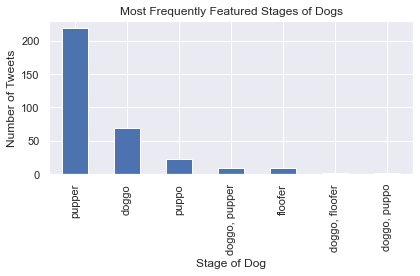

In [180]:
# most frequently featured stages of dog
df_stages_of_dog.nlargest(10,'tweet_counts').plot.bar(y='tweet_counts',legend=False)
plt.title('Most Frequently Featured Stages of Dogs')
plt.ylabel('Number of Tweets')
plt.xlabel('Stage of Dog')

plt.tight_layout()
plt.savefig(os.path.join(save_dir,'stage_frequency.png'))

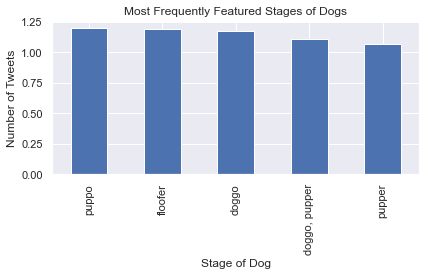

In [181]:
# average rating per stages of dog
df_stages_of_dog[df_stages_of_dog.tweet_counts>5].nlargest(10,'avg_rating').plot.bar(y='avg_rating',legend=False)
plt.title('Most Frequently Featured Stages of Dogs')
plt.ylabel('Number of Tweets')
plt.xlabel('Stage of Dog')

plt.tight_layout()
plt.savefig(os.path.join(save_dir,'stage_rating.png'))

In [ ]:
d